<a href="https://colab.research.google.com/github/KumuthuA/ml-project/blob/main/layer_12_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from google.colab import drive

In [ ]:
global labels
global features
labels = [f"label_{i+1}" for i in range(4)]
features = [f'feature_{i+1}' for i in range(768)]
label_1 = labels[0]
label_2 = labels[1]
label_3 = labels[2]
label_4 = labels[3]

In [ ]:
MOUNT_PATH='/content/drive'
drive.mount(MOUNT_PATH)
WORKING_DIR=f"{MOUNT_PATH}/MyDrive/ML/ML project/Layer 12"
train = pd.read_csv(f"{WORKING_DIR}/layer_12_train.csv")
valid = pd.read_csv(f"{WORKING_DIR}/layer_12_valid.csv")
test = pd.read_csv(f"{WORKING_DIR}/layer_12_test.csv")

Mounted at /content/drive


# Defining functions

In [ ]:
def data_preprocess(train_df, valid_df, test_df, label):
    scaler = StandardScaler()

    # Apply feature scaling to training data
    X_train = pd.DataFrame(scaler.fit_transform(train_df.drop(labels, axis=1)), columns=features)
    y_train = train_df[label]

    # Apply feature scaling to validation data
    X_valid = pd.DataFrame(scaler.transform(valid_df.drop(labels, axis=1)), columns=features)
    y_valid = valid_df[label]

    # Apply feature scaling to test data
    X_test = pd.DataFrame(scaler.transform(test_df.drop(labels, axis=1)), columns=features)
    y_test = test_df[label]
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [ ]:
def feature_engineering_with_pca(X_train, X_valid, X_test, n_components):

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components)

    # Create a new DataFrame with the PCA-transformed features
    X_train_pca = pca.fit_transform(X_train)
    X_train_df_pca = pd.DataFrame(X_train_pca)
    X_valid_df_pca = pd.DataFrame(pca.transform(X_valid))
    X_test_df_pca = pd.DataFrame(pca.transform(X_test))
    print("Shape for label2 train set:", X_train_df_pca.shape)
    print("Shape for label2 validation set:", X_valid_df_pca.shape)
    print("Shape for label2 validation set:", X_test_df_pca.shape)

    return X_train_df_pca, X_valid_df_pca, X_test_df_pca

In [ ]:
def feature_engineering_with_select_kbest(X_train, y_train, X_valid, X_test, n):
    selector = SelectKBest(f_classif, k=n)
    X_train_df = selector.fit_transform(X_train, y_train)
    X_valid_df = selector.transform(X_valid)
    X_test_df = selector.transform(X_test)
    print("Shape for label2 train set:", X_train_df.shape)
    print("Shape for label2 validation set:", X_valid_df.shape)
    print("Shape for label2 validation set:", X_test_df.shape)
    return X_train_df, X_valid_df, X_test_df

In [ ]:
def build_knn_model(X_train, y_train, n_neighbors):
    # Create and train your KNN classifier model
    # You can perform hyperparameter tuning by changing the value of 'n_neighbors'
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    return knn

In [ ]:
def build_svc_model(X_train, y_train):
    svc_model = SVC(kernel='linear', gamma='scale')
    svc_model.fit(X_train, y_train)
    return svc_model

In [ ]:
def evaluate(y_valid, y_pred):
    print(f"Accuracy: {accuracy_score(y_valid, y_pred)}")
    print(f"F1 Score: {f1_score(y_valid, y_pred, average='weighted')}")
    print(f"Precision: {precision_score(y_valid, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_valid, y_pred, average='weighted')}")

# Data preprocessing

In [ ]:
X_train_2, y_train_2, X_valid_2, y_valid_2, X_test_2, y_test_2 = data_preprocess(train, valid, test, label_2)
y_train_2.info()

<class 'pandas.core.series.Series'>
RangeIndex: 28520 entries, 0 to 28519
Series name: label_2
Non-Null Count  Dtype  
--------------  -----  
28040 non-null  float64
dtypes: float64(1)
memory usage: 222.9 KB


In [ ]:
train_df = train[train[label_2].notna()]
train_df.info()
valid_df = valid[valid[label_2].notna()]
valid_df.info()
test_df = test[test[label_2].notna()]
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28040 entries, 480 to 28519
Columns: 772 entries, feature_1 to label_4
dtypes: float64(769), int64(3)
memory usage: 165.4 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 736 entries, 14 to 749
Columns: 772 entries, feature_1 to label_4
dtypes: float64(769), int64(3)
memory usage: 4.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 6 to 749
Columns: 772 entries, feature_1 to label_4
dtypes: float64(769), int64(3)
memory usage: 4.4 MB


In [ ]:
X_train_2, y_train_2, X_valid_2, y_valid_2, X_test_2, y_test_2 = data_preprocess(train_df, valid_df, test_df, label_2)
y_train_2.info()

<class 'pandas.core.series.Series'>
Int64Index: 28040 entries, 480 to 28519
Series name: label_2
Non-Null Count  Dtype  
--------------  -----  
28040 non-null  float64
dtypes: float64(1)
memory usage: 438.1 KB


<Axes: title={'center': 'Imbalanced data'}>

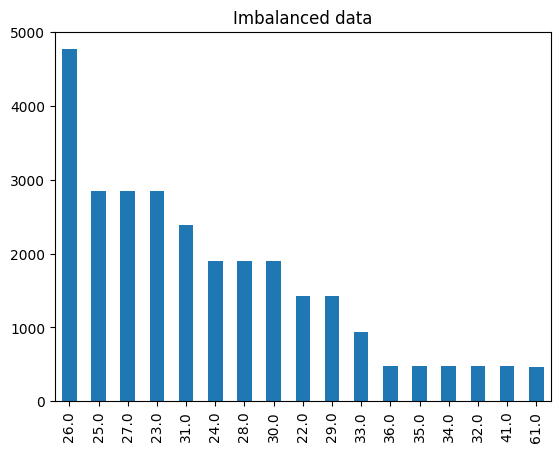

In [ ]:
y_train_2.value_counts().plot(kind='bar',title='Imbalanced data')

In [ ]:
resampler = RandomOverSampler(sampling_strategy='auto')
X_train_2_resampled, y_train_2_resampled = resampler.fit_resample(X_train_2, y_train_2)

<Axes: title={'center': 'Imbalanced data'}>

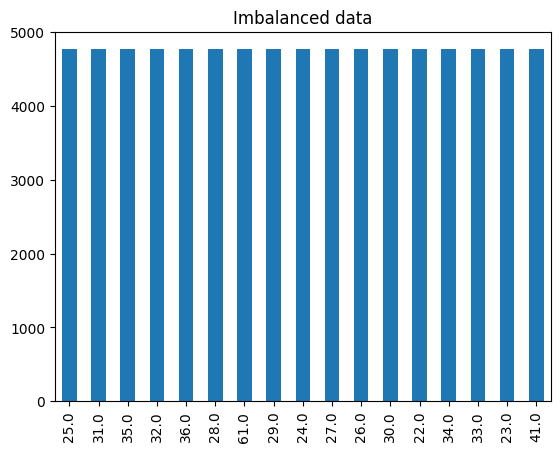

In [ ]:
y_train_2_resampled.value_counts().plot(kind='bar',title='Imbalanced data')

# Cross validation - Lable 02

In [ ]:
svc_model = SVC()
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


num_folds = 5

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

svc_scores = cross_val_score(svc_model, X_train_2, y_train_2, cv=kfold)
print("SVC Cross-Validation Scores:")
for i, score in enumerate(svc_scores):
    print(f"Fold {i+1} - Accuracy: {score:.2f}")
svc_mean_accuracy = svc_scores.mean()
print(f"Mean Accuracy (SVC): {svc_mean_accuracy:.2f}")

knn_scores = cross_val_score(knn_model, X_train_2, y_train_2, cv=kfold)
print("\nKNN Cross-Validation Scores:")
for i, score in enumerate(knn_scores):
    print(f"Fold {i+1} - Accuracy: {score:.2f}")
knn_mean_accuracy = knn_scores.mean()
print(f"Mean Accuracy (KNN): {knn_mean_accuracy:.2f}")

rf_scores = cross_val_score(rf_model, X_train_2, y_train_2, cv=kfold)
print("Random Forest Cross-Validation Scores:")
for i, score in enumerate(rf_scores):
    print(f"Fold {i+1} - Accuracy: {score:.2f}")
rf_mean_accuracy = rf_scores.mean()
print(f"Mean Accuracy (Random Forest): {rf_mean_accuracy:.2f}")

SVC Cross-Validation Scores:
Fold 1 - Accuracy: 0.78
Fold 2 - Accuracy: 0.78
Fold 3 - Accuracy: 0.78
Fold 4 - Accuracy: 0.76
Fold 5 - Accuracy: 0.77
Mean Accuracy (SVC): 0.77

KNN Cross-Validation Scores:
Fold 1 - Accuracy: 0.70
Fold 2 - Accuracy: 0.69
Fold 3 - Accuracy: 0.69
Fold 4 - Accuracy: 0.68
Fold 5 - Accuracy: 0.69
Mean Accuracy (KNN): 0.69
Random Forest Cross-Validation Scores:
Fold 1 - Accuracy: 0.58
Fold 2 - Accuracy: 0.57
Fold 3 - Accuracy: 0.58
Fold 4 - Accuracy: 0.55
Fold 5 - Accuracy: 0.57
Mean Accuracy (Random Forest): 0.57


# Feature reduction using PCA - Label 02

In [ ]:
pca=PCA(0.99)
pca = pca.fit(X_train_2)

X_train_2_pca =pca.fit_transform(X_train_2)
X_valid_2_pca = pca.transform(X_valid_2)
X_test_2_pca = pca.transform(X_test_2)

In [ ]:
X_train_2_pca.shape

(28040, 281)

In [ ]:
model_2_pca_knn = build_knn_model(X_train_2_pca, y_train_2, 5)

y_pred_2_knn = model_2_pca_knn.predict(X_valid_2_pca)

evaluate(y_valid_2, y_pred_2_knn)

Accuracy: 0.6970108695652174
F1 Score: 0.6984906251951799
Precision: 0.7238337228522056
Recall: 0.6970108695652174


In [ ]:
model_2_pca_svc = SVC(kernel='rbf', class_weight="balanced")
model_2_pca_svc.fit(X_train_2_resampled, y_train_2_resampled)

y_pred_2_svc = model_2_pca_svc.predict(X_valid_2)

evaluate(y_valid_2, y_pred_2_svc)

Accuracy: 0.842391304347826
F1 Score: 0.8421555370204961
Precision: 0.8449675914033853
Recall: 0.842391304347826


In [ ]:
model_2_pca_svc_no_resampling = SVC(kernel='rbf', class_weight="balanced")
model_2_pca_svc_no_resampling.fit(X_train_2_pca, y_train_2)

y_pred_2_svc_no_resampling = model_2_pca_svc_no_resampling.predict(X_valid_2_pca)
y_pred_2_svc_no_resampling_test = model_2_pca_svc_no_resampling.predict(X_test_2_pca)

evaluate(y_valid_2, y_pred_2_svc_no_resampling)
evaluate(y_test_2, y_pred_2_svc_no_resampling_test)

Accuracy: 0.779891304347826
F1 Score: 0.7802772658032329
Precision: 0.7848200534617404
Recall: 0.779891304347826
Accuracy: 0.7876344086021505
F1 Score: 0.7866494712345021
Precision: 0.7913063290792476
Recall: 0.7876344086021505


# Hyperparameter tuning for label 2

In [ ]:
param_grid_2 = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

model_2_knn = KNeighborsClassifier()

grid_search_2 = GridSearchCV(estimator=model_2_knn, param_grid=param_grid_2, cv=5, verbose=3, n_jobs=-1, scoring='accuracy')

grid_search_2.fit(X_train_2_pca, y_train_2)

best_params_2 = grid_search_2.best_params_
best_model_2 = grid_search_2.best_estimator_

valid_accuracy_2 = best_model_2.score(X_valid_2_pca, y_valid_2)

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters:", best_params_2)
print("Test Accuracy:", valid_accuracy_2)
#3, distance , 0.892

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
Test Accuracy: 0.6997282608695652


In [ ]:
param_grid_2_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}

model_2_svc = SVC()

grid_search_2_svc = GridSearchCV(estimator=model_2_svc, param_grid=param_grid_2_svc, cv=5, verbose=3, n_jobs=-1, scoring='accuracy')

grid_search_2_svc.fit(X_train_2_pca, y_train_2)

best_params_2_svc = grid_search_2_svc.best_params_
best_model_2_svc = grid_search_2_svc.best_estimator_

valid_accuracy_2_svc = best_model_2_svc.score(X_valid_2_pca, y_valid_2)

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters:", best_params_2_svc)
print("Test Accuracy:", valid_accuracy_2_svc)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


# Predicting label 02

In [ ]:
y_pred_2_knn = model_2_pca_knn.predict(X_test_2_pca)
output_df_2 = pd.DataFrame({'ID': range(1, len(y_pred_2_knn) + 1), 'label_2': y_pred_2_knn})

output_file_path_2 = f"{WORKING_DIR}/layer_12_2_out_svc_final_knn_pca.csv"
output_df_2.to_csv(output_file_path_2, index=False)
print(f'Predictions saved to {output_file_path_2}')

Predictions saved to /content/drive/MyDrive/ML/ML project/Layer 12/layer_12_2_out_svc_final_knn_pca.csv


In [ ]:
y_pred_2 = model_2_pca_svc.predict(X_test_2)
output_df_2 = pd.DataFrame({'ID': range(1, len(y_pred_2) + 1), 'label_2': y_pred_2})

output_file_path_2 = f"{WORKING_DIR}/layer_12_2_out_svc_final_pca_today.csv"
output_df_2.to_csv(output_file_path_2, index=False)
print(f'Predictions saved to {output_file_path_2}')

Predictions saved to /content/drive/MyDrive/ML/ML project/Layer 12/layer_12_2_out_svc_final_pca_today.csv


In [ ]:
y_pred_train = model_2_pca_svc.predict(X_train_2)
output_df_2_train = pd.DataFrame({'ID': range(1, len(y_pred_train) + 1), 'label_2': y_pred_train})

output_file_path_2_train = f"{WORKING_DIR}/layer_12_2_train.csv"
output_df_2_train.to_csv(output_file_path_2_train, index=False)
print(f'Predictions saved to {output_file_path_2}')

Predictions saved to /content/drive/MyDrive/ML/ML project/Layer 12/layer_12_2_out_svc_final_pca_today.csv
